# Introduction to data science

- Competition: `Titanic`
- Link: https://www.kaggle.com/competitions/titanic

## Download training set and test set

In [1]:
train_path = 'train.csv'
test_path = 'test.csv'

## Import the utilize package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reset train set and test set

In [3]:
train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)
full = pd.concat([train_set, test_set], ignore_index=True)

## Feature Engineering

### Describe each feature type

In [4]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Check if data mising

In [5]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

註：從這邊我們可以發現數據存在著一些數據遺失（像是Cabin大量遺失， Age部分遺失）

### Describe the correlation of each train features

#### Analysis corr

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


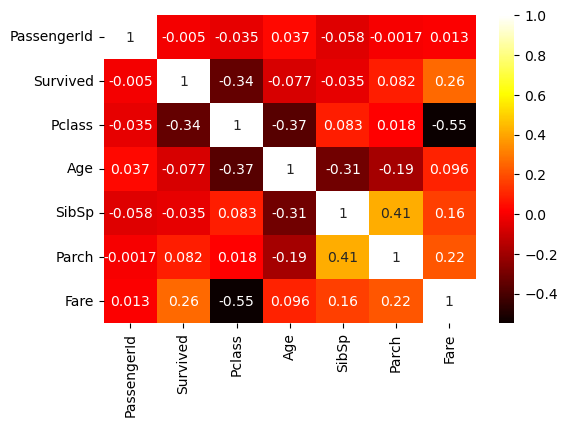

In [6]:
# Select only numeric columns
numeric_train_set = train_set.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_train_set.corr()['Survived'].abs().sort_values(ascending=False)
print(corr)

plt.figure(figsize=(6,4))
plt.subplot()
sns.heatmap(numeric_train_set.corr(), cmap='hot', annot=True)
plt.show()

註：從這個corr圖表來看可以知道大部分特徵與死亡率的關係高低，啊passengerID巨屎

#### Embarked analyze and missing data processing

In [7]:
# Analyze embarked type
print(train_set['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


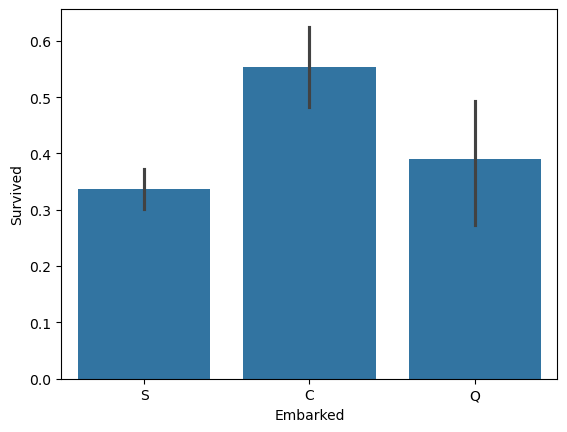

In [8]:
# Analyze survived rate reflected by embarked type
sns.barplot(x='Embarked', y='Survived', data=train_set)
display(train_set[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().round(3))

註：可以觀察到雖然從S上船的人數最多，但是最後生存率偏低，大概能猜到他應該是最多貧民上船的地方

In [9]:
# Check where is the missing value
train_set[train_set['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


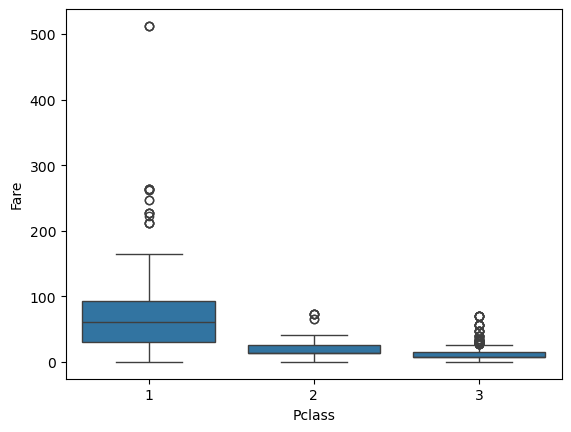

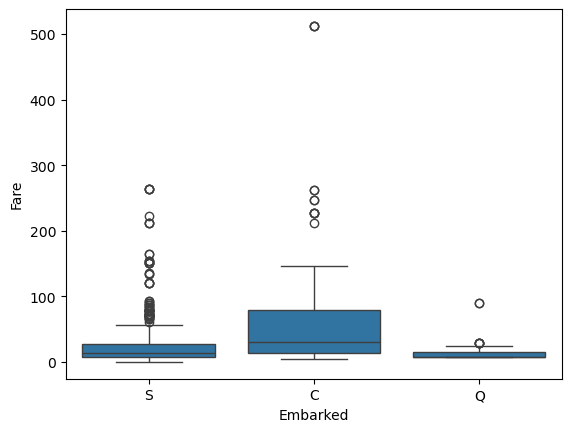

In [10]:
# Check the correlation between fare and Pclass
sns.boxplot(x='Pclass', y='Fare', data=train_set)
plt.show()

# Check the correlation between fare and embarked
sns.boxplot(x='Embarked', y='Fare', data=train_set)
plt.show()

註：能看得出來C地的票價應該是最高的，並且這兩位都是搭頭等船艙，所以給他們上船地點為C

In [11]:
# Fill the missing value with 'C'
full['Embarked'].fillna('C', inplace=True)

/var/folders/vs/95f5wvm91c34z479dt731fbh0000gn/T/ipykernel_1165/1288574009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full['Embarked'].fillna('C', inplace=True)


#### Analyze Name

In [12]:
# Check the title of each name
full['Title'] = full['Name'].str.extract(r'([A-Za-z]+\.)', expand=False)
full['Title'].value_counts()

Title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [13]:
# Split the title into Civilian and Military
Civilian = ['Mr.','Mrs.','Miss.','Master.','Ms.','Mlle.','Mme.']
Military = ['Rev.','Dr.','Lady.','Countess.','Don.','Jonkheer.','Col.','Major.','Capt.','Sir.','Dona.']

# Add a new column 'Identity', and fill it with 'Military' and we would split 'Civilian' into male, female and child.
female = ['Mrs.','Miss.','Ms.','Mlle.','Mme.']

full['Identity'] = 'Military'
full.loc[full['Title'] == 'Mr.', 'Identity'] = 'Male'
full.loc[full['Title'] == 'Master.', 'Identity'] = 'Child'
for f in female:
    full.loc[full['Title'] == f, 'Identity'] = 'Female'

# Check the survived rate reflected by Identity
full_filtered = full.loc[full.Survived.notnull()]
survived_rate=full_filtered[full_filtered.Survived==1]['Identity'].value_counts()/full_filtered.loc[full_filtered.Survived.notnull(),'Identity'].value_counts()
print(survived_rate)

Identity
Child       0.575000
Female      0.739550
Male        0.156673
Military    0.347826
Name: count, dtype: float64


註：與我們之前觀察到的數據一樣，確實Female比較容易存活，Male存活率最低<br>
雖不知道為什麼貴族會有點低~~可能是什麼聖人心態發作~~

#### Deal with age missing data

In [14]:
# Fill the missing value of Age to the mean of the same group of 'Title'
full_filtered['Age'] = full_filtered.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))

# Split the Age into 3 groups
full['AgeGroup'] = pd.cut(train_set.Age,bins=[0,16,50,100])
full_filtered = full.loc[full.Survived.notnull()]
print(full_filtered[['AgeGroup','Survived']].groupby(['AgeGroup'], as_index=False).mean().round(3))

    AgeGroup  Survived
0    (0, 16]     0.550
1   (16, 50]     0.387
2  (50, 100]     0.344


/var/folders/vs/95f5wvm91c34z479dt731fbh0000gn/T/ipykernel_1165/3318837389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_filtered['Age'] = full_filtered.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))
/var/folders/vs/95f5wvm91c34z479dt731fbh0000gn/T/ipykernel_1165/3318837389.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(full_filtered[['AgeGroup','Survived']].groupby(['AgeGroup'], as_index=False).mean().round(3))


#### Handling Fare missing

In [15]:
# Fill the missing value of fare to the mean of the same group of 'Pclass'
full['Fare'] = full.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1309 non-null   object  
 12  Title        1309 non-null   object  
 13  Identity     1309 non-null   object  
 14  AgeGroup     714 non-null    category
dtypes: category(1), float64(3), int64(4), object(7)
memory usage: 144.7+ KB


### Feature processing

In [16]:
full_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    float64 
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Title        891 non-null    object  
 13  Identity     891 non-null    object  
 14  AgeGroup     714 non-null    category
dtypes: category(1), float64(3), int64(4), object(7)
memory usage: 105.4+ KB


In [17]:
# Drop the columns that are not useful
full.drop(['PassengerId','Name','Cabin', 'Ticket', 'SibSp', 'Age'], axis=1, inplace=True)
full['Sex'] = full['Sex'].apply(lambda x: 0 if x == 'female' else 1)
full = pd.get_dummies(full)
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    float64
 1   Pclass              1309 non-null   int64  
 2   Sex                 1309 non-null   int64  
 3   Parch               1309 non-null   int64  
 4   Fare                1309 non-null   float64
 5   Embarked_C          1309 non-null   bool   
 6   Embarked_Q          1309 non-null   bool   
 7   Embarked_S          1309 non-null   bool   
 8   Title_Capt.         1309 non-null   bool   
 9   Title_Col.          1309 non-null   bool   
 10  Title_Countess.     1309 non-null   bool   
 11  Title_Don.          1309 non-null   bool   
 12  Title_Dona.         1309 non-null   bool   
 13  Title_Dr.           1309 non-null   bool   
 14  Title_Jonkheer.     1309 non-null   bool   
 15  Title_Lady.         1309 non-null   bool   
 16  Title_

### Normalization

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

train_set = full.loc[full.Survived.notnull()]
test_set = full.loc[full.Survived.isnull()]
x_train = train_set.drop('Survived', axis=1)
y_train = train_set['Survived']
test_set = test_set.drop('Survived', axis=1)

# Normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
test_set = scaler.transform(test_set)

#### Training

In [19]:
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
# For RF
param_grid={'min_samples_split':[2],'max_samples':[0.5,0.6,0.7,0.8,0.9,1],'max_features':['sqrt'],'n_estimators':[300]}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid, cv=5)
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'min_samples_split': [2], 'n_estimators': [300]})

In [21]:
# For SVC
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
svc = SVC()
grid_search_svc = GridSearchCV(svc, param_grid, cv=5)
grid_search_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [22]:
# For KNN
param_grid={'n_neighbors':np.arange(3,30)}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [23]:
# For GB
param_grid={'n_estimators':[300],'learning_rate':[0.1,0.05,0.02],'max_depth':[3,4,5]}
gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb, param_grid, cv=5)
grid_search_gb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.02],
                         'max_depth': [3, 4, 5], 'n_estimators': [300]})

In [24]:
# For AdaBoost
import warnings
warnings.filterwarnings('ignore')

param_grid={'n_estimators':[300],'learning_rate':[0.1,0.05,0.02]}
ada = AdaBoostClassifier()
grid_search_ada = GridSearchCV(ada, param_grid, cv=5)
grid_search_ada.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.02],
                         'n_estimators': [300]})

In [25]:
# For LR
param_grid={'C':[0.1,1,10,100]}
lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid, cv=5)
grid_search_lr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]})

In [ ]:
# For Catboost
from catboost import CatBoostClassifier
param_grid={'iterations':[300],'learning_rate':[0.01, 0.1,0.05,0.02],'depth':[3,4,5, 6]}
cat = CatBoostClassifier(verbose=False, early_stopping_rounds=100, random_state=0)
grid_search_cat = GridSearchCV(cat, param_grid, cv=5)
grid_search_cat.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x1782cba40>,
             param_grid={'depth': [3, 4, 5, 6],
                         'iterations': [500, 600, 800, 1000],
                         'learning_rate': [0.01, 0.1, 0.05, 0.02]})

In [ ]:
# For XGBoost
from xgboost import XGBClassifier
param_grid={'n_estimators':[300],'learning_rate':[0.01, 0.1, 0.05, 0.02],'max_depth':[3,4,5]}
xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5)
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.02],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [500, 600, 800, 1000]})

In [28]:
# Train the model
model = [grid_search_rf, grid_search_svc, grid_search_knn, grid_search_gb, grid_search_ada, grid_search_lr, grid_search_cat, grid_search_xgb]
model_mean = []
model_std = []

for m in model:
    scores = cross_val_score(m, x_train, y_train, cv=5)
    model_mean.append(scores.mean())
    model_std.append(scores.std())
model_result = pd.DataFrame({'Model':['RandomForest','SVC','KNN','GradientBoosting','AdaBoost','LogisticRegression', 'CatBoostClassifier', 'XGBClassifier'],'Mean':model_mean,'Std':model_std})

print(model_result)

                Model      Mean       Std
0        RandomForest  0.823796  0.035265
1                 SVC  0.812598  0.028345
2                 KNN  0.808104  0.030691
3    GradientBoosting  0.818191  0.011950
4            AdaBoost  0.798029  0.023315
5  LogisticRegression  0.812611  0.019182
6  CatBoostClassifier  0.824901  0.022686
7       XGBClassifier  0.815956  0.010524


In [29]:
from sklearn.ensemble import VotingClassifier
estimators = [('rf', grid_search_rf.best_estimator_), ('svc', grid_search_svc.best_estimator_), ('knn', grid_search_knn.best_estimator_), ('gb', grid_search_gb.best_estimator_), ('ada', grid_search_ada.best_estimator_), ('lr', grid_search_lr.best_estimator_), ('cat', grid_search_cat.best_estimator_), ('xgb', grid_search_xgb.best_estimator_)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_samples=0.5,
                                                     n_estimators=300)),
                             ('svc', SVC(C=10, gamma=0.01)),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.02,
                                                         max_depth=5,
                                                         n_estimators=300)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=300)),
                             ('lr', LogisticRegression(C=0.1)),
                             ('ca...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=800, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [32]:
# Predict the result
y_pred = ensemble.predict(test_set).astype(int)
passenger_id = pd.read_csv(test_path)['PassengerId']

submission = pd.DataFrame({'PassengerId':passenger_id,'Survived':y_pred})
submission.to_csv('submission.csv', index=False)